In [30]:
from sklearn.metrics import classification_report

In [1]:
import pandas as pd

df = pd.read_csv('/content/COVID-19_Dataset.csv')
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                186 non-null    float64
 1   temperature        190 non-null    float64
 2   heart_rate         191 non-null    float64
 3   respiratory_rate   191 non-null    float64
 4   oxygen_saturation  190 non-null    float64
 5   wbc_count          193 non-null    float64
 6   rbc_count          189 non-null    float64
 7   hemoglobin         184 non-null    float64
 8   platelet_count     192 non-null    float64
 9   d_dimer            189 non-null    float64
 10  crp                193 non-null    float64
 11  ferritin           193 non-null    float64
 12  ldh                187 non-null    float64
 13  alt                188 non-null    float64
 14  COVID_status       200 non-null    object 
dtypes: float64(14), object(1)
memory usage: 23.6+ KB
None
              age  t

In [2]:
df

,age,temperature,heart_rate,respiratory_rate,oxygen_saturation,wbc_count,rbc_count,hemoglobin,platelet_count,d_dimer,crp,ferritin,ldh,alt,COVID_status
0,69.0,36.4,102.0,21.0,95.0,3.9,4.8,12.9,193.0,0.51,4.6,171.0,224.0,25.0,Negative
1,32.0,36.7,70.0,28.0,99.0,4.3,4.7,13.8,237.0,0.25,NaN,476.0,191.0,8.0,Negative
2,89.0,37.7,77.0,25.0,92.0,8.3,5.0,11.4,275.0,0.55,1.1,450.0,192.0,37.0,Positive
3,NaN,36.0,106.0,20.0,NaN,3.6,4.6,16.4,232.0,0.57,3.9,449.0,207.0,56.0,Positive
4,38.0,37.2,NaN,25.0,91.0,10.5,4.7,13.0,373.0,0.24,6.2,285.0,253.0,3.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50.0,36.3,NaN,12.0,98.0,9.1,4.5,14.9,161.0,0.26,1.4,390.0,186.0,38.0,Negative
196,57.0,37.1,96.0,16.0,88.0,0.4,4.5,16.1,313.0,NaN,4.8,383.0,224.0,29.0,Positive
197,56.0,36.5,112.0,20.0,90.0,8.8,3.7,15.1,NaN,0.49,3.2,281.0,233.0,26.0,Positive
198,18.0,37.8,96.0,28.0,91.0,6.5,5.0,12.9,244.0,0.54,-0.3,105.0,222.0,26.0,Positive


In [2]:
df.isnull().sum()

,0
age,14
temperature,10
heart_rate,9
respiratory_rate,9
oxygen_saturation,10
wbc_count,7
rbc_count,11
hemoglobin,16
platelet_count,8
d_dimer,11


In [3]:
df_mean = df.fillna(df.mean(numeric_only=True))
df_mean

,age,temperature,heart_rate,respiratory_rate,oxygen_saturation,wbc_count,rbc_count,hemoglobin,platelet_count,d_dimer,crp,ferritin,ldh,alt,COVID_status
0,69.000000,36.4,102.000000,21.0,95.000000,3.9,4.800000,12.9,193.000000,0.510000,4.600000,171.0,224.0,25.0,Negative
1,32.000000,36.7,70.000000,28.0,99.000000,4.3,4.700000,13.8,237.000000,0.250000,3.025389,476.0,191.0,8.0,Negative
2,89.000000,37.7,77.000000,25.0,92.000000,8.3,5.000000,11.4,275.000000,0.550000,1.100000,450.0,192.0,37.0,Positive
3,52.672043,36.0,106.000000,20.0,92.357895,3.6,4.600000,16.4,232.000000,0.570000,3.900000,449.0,207.0,56.0,Positive
4,38.000000,37.2,89.439791,25.0,91.000000,10.5,4.700000,13.0,373.000000,0.240000,6.200000,285.0,253.0,3.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50.000000,36.3,89.439791,12.0,98.000000,9.1,4.500000,14.9,161.000000,0.260000,1.400000,390.0,186.0,38.0,Negative
196,57.000000,37.1,96.000000,16.0,88.000000,0.4,4.500000,16.1,313.000000,0.508254,4.800000,383.0,224.0,29.0,Positive
197,56.000000,36.5,112.000000,20.0,90.000000,8.8,3.700000,15.1,242.947917,0.490000,3.200000,281.0,233.0,26.0,Positive
198,18.000000,37.8,96.000000,28.0,91.000000,6.5,5.000000,12.9,244.000000,0.540000,-0.300000,105.0,222.0,26.0,Positive


In [4]:
df_mean.isnull().sum()

,0
age,0
temperature,0
heart_rate,0
respiratory_rate,0
oxygen_saturation,0
wbc_count,0
rbc_count,0
hemoglobin,0
platelet_count,0
d_dimer,0


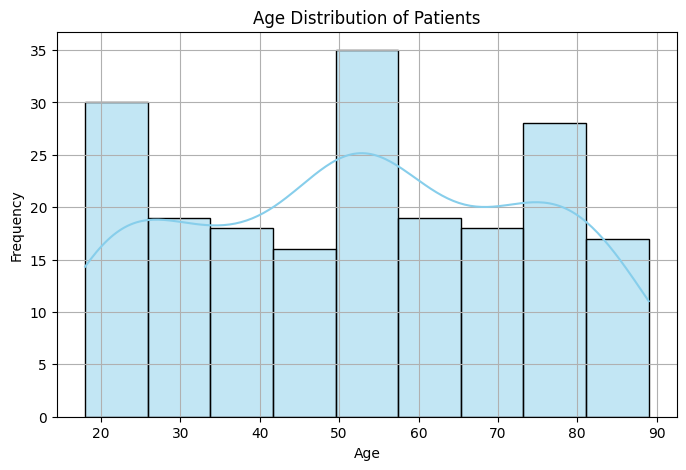

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_mean['age'], kde=True, color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<ipython-input-6-2786845316>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_mean, x='COVID_status', y='d_dimer', palette='Set2')


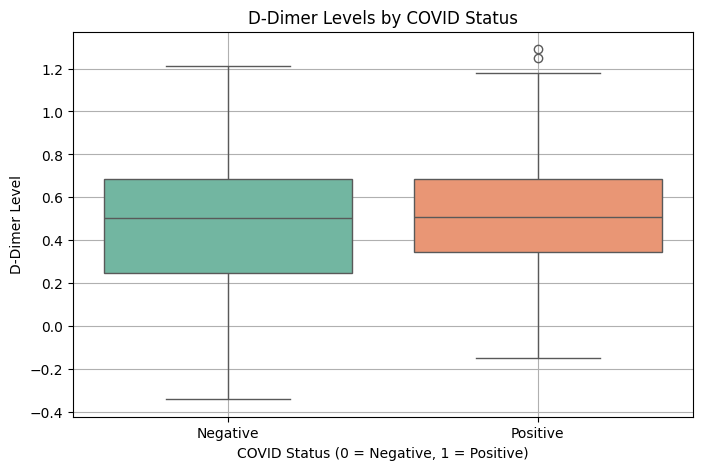

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_mean, x='COVID_status', y='d_dimer', palette='Set2')
plt.title('D-Dimer Levels by COVID Status')
plt.xlabel('COVID Status (0 = Negative, 1 = Positive)')
plt.ylabel('D-Dimer Level')
plt.grid(True)
plt.show()


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_mean['COVID_status'] = le.fit_transform(df_mean['COVID_status'])

df

,age,temperature,heart_rate,respiratory_rate,oxygen_saturation,wbc_count,rbc_count,hemoglobin,platelet_count,d_dimer,crp,ferritin,ldh,alt,COVID_status
0,69.0,36.4,102.0,21.0,95.0,3.9,4.8,12.9,193.0,0.51,4.6,171.0,224.0,25.0,Negative
1,32.0,36.7,70.0,28.0,99.0,4.3,4.7,13.8,237.0,0.25,NaN,476.0,191.0,8.0,Negative
2,89.0,37.7,77.0,25.0,92.0,8.3,5.0,11.4,275.0,0.55,1.1,450.0,192.0,37.0,Positive
3,NaN,36.0,106.0,20.0,NaN,3.6,4.6,16.4,232.0,0.57,3.9,449.0,207.0,56.0,Positive
4,38.0,37.2,NaN,25.0,91.0,10.5,4.7,13.0,373.0,0.24,6.2,285.0,253.0,3.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50.0,36.3,NaN,12.0,98.0,9.1,4.5,14.9,161.0,0.26,1.4,390.0,186.0,38.0,Negative
196,57.0,37.1,96.0,16.0,88.0,0.4,4.5,16.1,313.0,NaN,4.8,383.0,224.0,29.0,Positive
197,56.0,36.5,112.0,20.0,90.0,8.8,3.7,15.1,NaN,0.49,3.2,281.0,233.0,26.0,Positive
198,18.0,37.8,96.0,28.0,91.0,6.5,5.0,12.9,244.0,0.54,-0.3,105.0,222.0,26.0,Positive


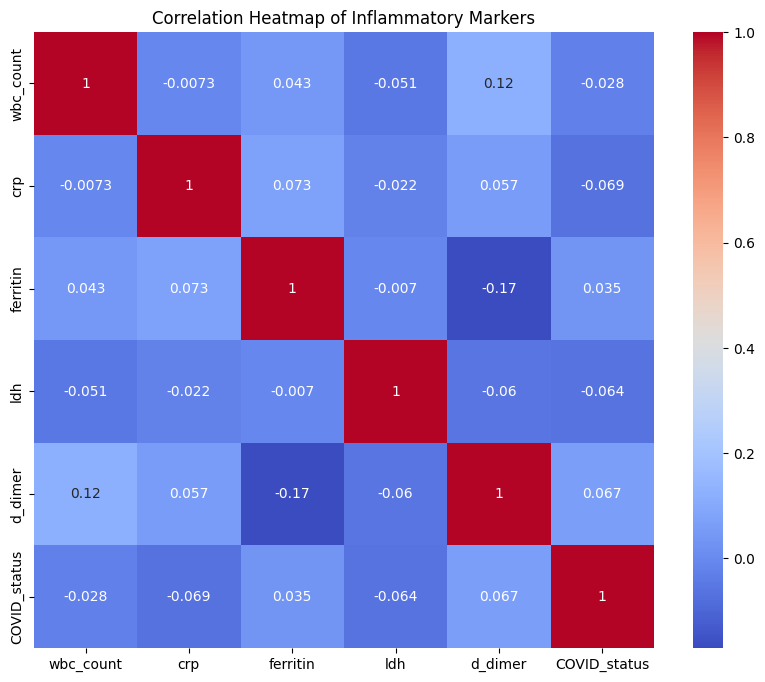

In [9]:
plt.figure(figsize=(10, 8))
corr_features = ['wbc_count', 'crp', 'ferritin', 'ldh', 'd_dimer', 'COVID_status']
sns.heatmap(df_mean[corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Inflammatory Markers')
plt.show()


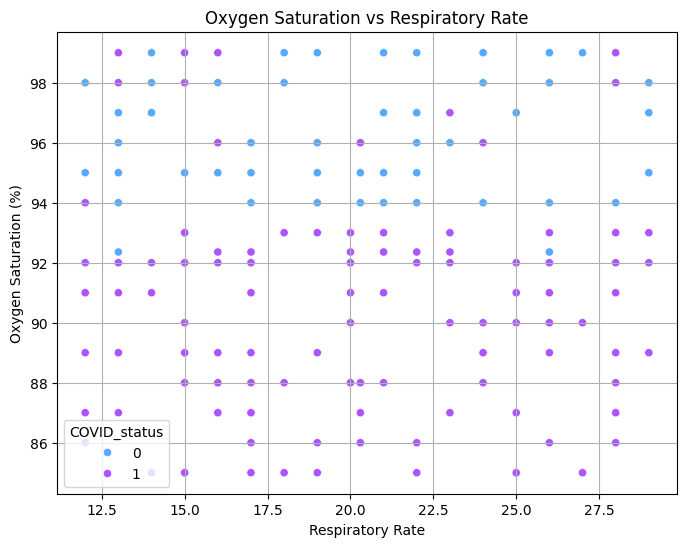

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_mean, x='respiratory_rate', y='oxygen_saturation', hue='COVID_status', palette='cool')
plt.title('Oxygen Saturation vs Respiratory Rate')
plt.xlabel('Respiratory Rate')
plt.ylabel('Oxygen Saturation (%)')
plt.grid(True)
plt.show()


In [11]:
df_mean['inflammation_index'] = df_mean[['crp', 'ferritin', 'ldh']].mean(axis=1)


In [12]:
df_mean

,age,temperature,heart_rate,respiratory_rate,oxygen_saturation,wbc_count,rbc_count,hemoglobin,platelet_count,d_dimer,crp,ferritin,ldh,alt,COVID_status,inflammation_index
0,69.000000,36.4,102.000000,21.0,95.000000,3.9,4.800000,12.9,193.000000,0.510000,4.600000,171.0,224.0,25.0,0,133.200000
1,32.000000,36.7,70.000000,28.0,99.000000,4.3,4.700000,13.8,237.000000,0.250000,3.025389,476.0,191.0,8.0,0,223.341796
2,89.000000,37.7,77.000000,25.0,92.000000,8.3,5.000000,11.4,275.000000,0.550000,1.100000,450.0,192.0,37.0,1,214.366667
3,52.672043,36.0,106.000000,20.0,92.357895,3.6,4.600000,16.4,232.000000,0.570000,3.900000,449.0,207.0,56.0,1,219.966667
4,38.000000,37.2,89.439791,25.0,91.000000,10.5,4.700000,13.0,373.000000,0.240000,6.200000,285.0,253.0,3.0,1,181.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50.000000,36.3,89.439791,12.0,98.000000,9.1,4.500000,14.9,161.000000,0.260000,1.400000,390.0,186.0,38.0,0,192.466667
196,57.000000,37.1,96.000000,16.0,88.000000,0.4,4.500000,16.1,313.000000,0.508254,4.800000,383.0,224.0,29.0,1,203.933333
197,56.000000,36.5,112.000000,20.0,90.000000,8.8,3.700000,15.1,242.947917,0.490000,3.200000,281.0,233.0,26.0,1,172.400000
198,18.000000,37.8,96.000000,28.0,91.000000,6.5,5.000000,12.9,244.000000,0.540000,-0.300000,105.0,222.0,26.0,1,108.900000


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df_mean.drop('COVID_status', axis=1)
y = df_mean['COVID_status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True)
}


In [19]:
model_outputs = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    model_outputs[name] = {
        'y_pred': y_pred,
        'y_proba': y_proba
    }

    print(f"\n Model: {name}")
    print(classification_report(y_test, y_pred))



 Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        15
           1       0.86      0.76      0.81        25

    accuracy                           0.78        40
   macro avg       0.77      0.78      0.77        40
weighted avg       0.79      0.78      0.78        40


 Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.93      1.00      0.96        25

    accuracy                           0.95        40
   macro avg       0.96      0.93      0.95        40
weighted avg       0.95      0.95      0.95        40


 Model: SVM
              precision    recall  f1-score   support

           0       0.73      0.53      0.62        15
           1       0.76      0.88      0.81        25

    accuracy                           0.75        40
   macro avg       0.74      0.71      0.72        40
weighted 

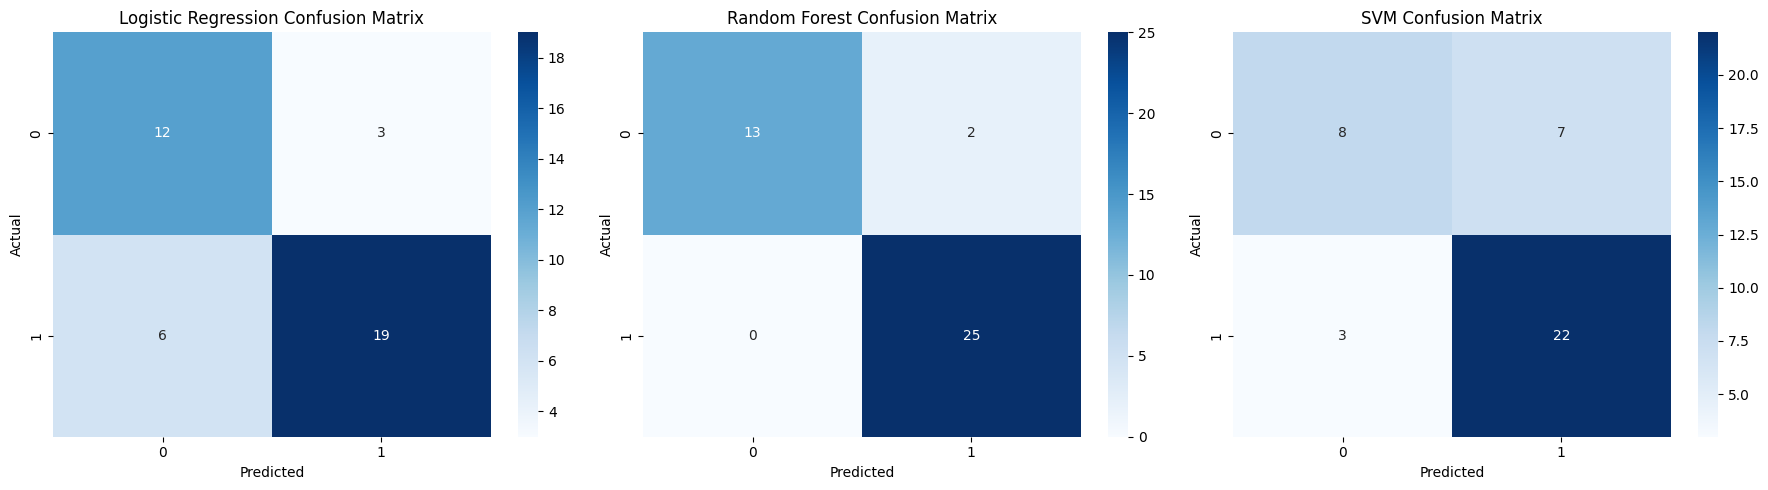

In [20]:
plt.figure(figsize=(18, 5))

for i, (name, output) in enumerate(model_outputs.items()):
    cm = confusion_matrix(y_test, output['y_pred'])
    plt.subplot(1, 3, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


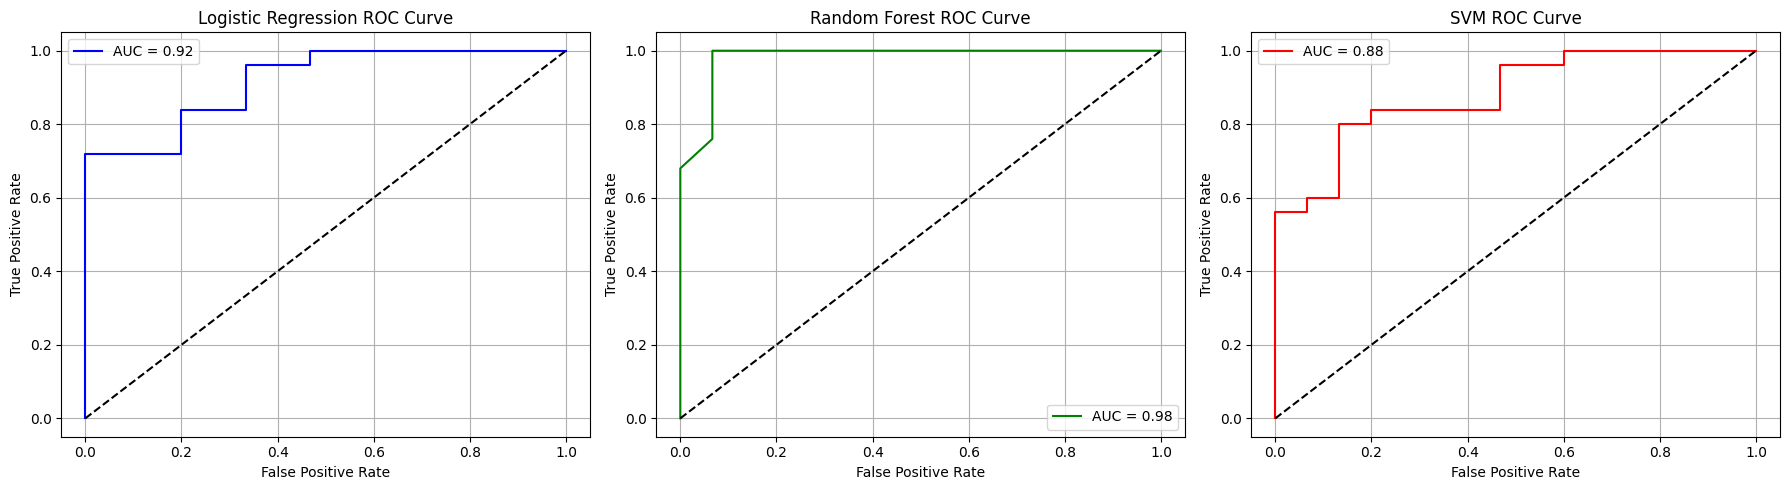

In [22]:
colors = {
    'Logistic Regression': 'blue',
    'Random Forest': 'green',
    'SVM': 'red'
}

# Create subplots
plt.figure(figsize=(18, 5))

for i, (name, output) in enumerate(model_outputs.items()):
    y_proba = output['y_proba']
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    plt.subplot(1, 3, i + 1)
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color=colors[name])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"{name} ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
results = {}

for name, model in models.items():
    y_pred = model_outputs[name]['y_pred']
    y_proba = model_outputs[name]['y_proba']

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_proba)
    }


<Figure size 1000x600 with 0 Axes>

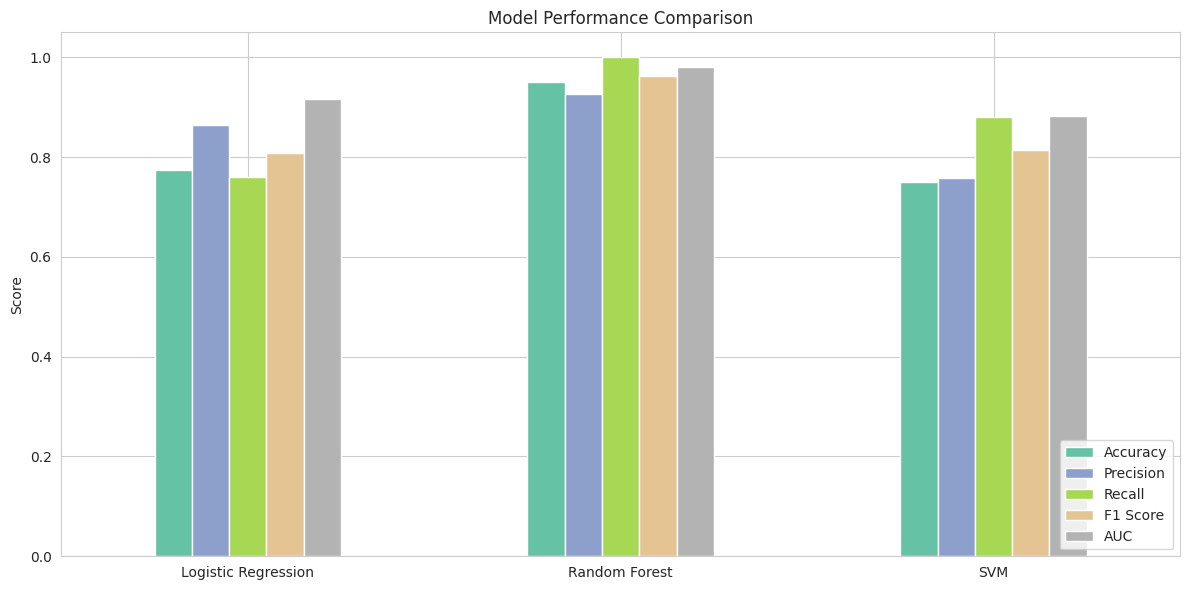

In [26]:
results_df = pd.DataFrame(results).T  # transpose to get models as rows

# Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
results_df.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# base model
rf = RandomForestClassifier(random_state=42)

# GridSearch
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='f1', cv=5, n_jobs=-1, verbose=1)

# Fit on training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [31]:
best_rf = grid_search.best_estimator_

# Predict with the tuned model
y_pred_tuned = best_rf.predict(X_test)
y_proba_tuned = best_rf.predict_proba(X_test)[:, 1]

# metrics
print("Classification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_tuned))



Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.93      1.00      0.96        25

    accuracy                           0.95        40
   macro avg       0.96      0.93      0.95        40
weighted avg       0.95      0.95      0.95        40



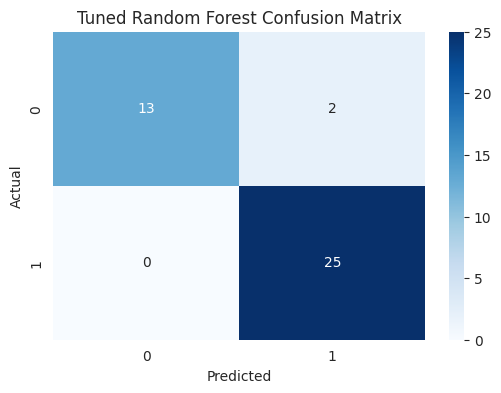

In [32]:
cm = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Tuned Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

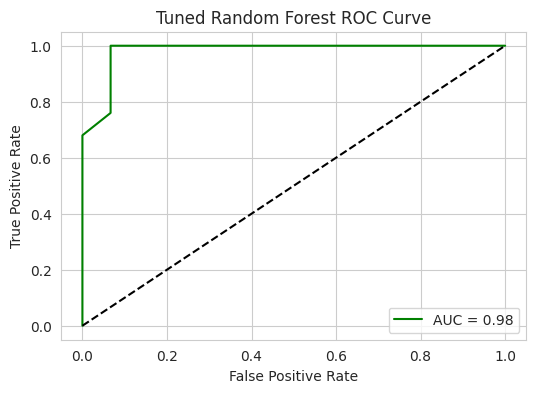

In [33]:
fpr, tpr, _ = roc_curve(y_test, y_proba_tuned)
auc = roc_auc_score(y_test, y_proba_tuned)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Tuned Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
import joblib
joblib.dump(best_rf, 'random_forest_covid_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [36]:
from google.colab import files

files.download('random_forest_covid_model.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>